In [1]:
import hydra
import wandb 
import os
import ddm_stride.__init__
from ddm_stride.pipeline.evaluate import load_experimental_data
import warnings
warnings.filterwarnings('ignore')

# Adapt the path of the results folder
dir = os.environ['DDM_STRIDE_DIR'] + '/results/${result_folder}'

The quickstart tutorial applies a Basic DDM with parameters `drift`, `boundary_separation` and `starting_point` of the decision variable to the [Roitman and Shadlen](https://shadlenlab.columbia.edu/resources/RoitmanDataCode.html) dataset. The dataset contains reaction times and choices of monkeys discriminating between two directions of random dot motion. The pipeline is configured by the *basic_ddm.yaml* configuration files in the *config/algorithm*, *config/ddm_model* and *config/task* folders.

### Simulate training and test data

In [6]:
%run ../ddm_stride/run.py hydra.run.dir={dir} run_simulate=True 

parameter names and experimental conditions:  ['drift', 'boundary_separation', 'starting_point']
simulation results:  ['rt', 'choice']


Running 50000 simulations in 500 batches.:   0%|          | 0/500 [00:00<?, ?it/s]

Running 2000 simulations in 20 batches.:   0%|          | 0/20 [00:00<?, ?it/s]

Running 2500 simulations in 25 batches.:   0%|          | 0/25 [00:00<?, ?it/s]

### Train the MNLE using 2 different hyperparameter configurations
You can enter the user *ddmstride* with password *ddm_stride_22* as a default account for WandB.

In [3]:
wandb.login(relogin=False)

[2022-05-31 10:29:04,873][wandb.jupyter][ERROR] - Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


wandb: Currently logged in as: ddm_stride. Use `wandb login --relogin` to force relogin


True

In [4]:
%run ../ddm_stride/run.py hydra.run.dir={dir} run_train=True 

Create sweep with ID: x9hvfc9t
Sweep URL: https://wandb.ai/ddm_stride/basic_ddm/sweeps/x9hvfc9t
[2022-05-31 10:29:14,142][wandb.agents.pyagent][INFO] - Starting sweep agent: entity=None, project=basic_ddm, count=2


wandb: Agent Starting Run: zqiu6j6d with config:
wandb: 	hidden_features: 50
wandb: 	hidden_layers: 2
wandb: 	learning_rate: 0.004640227661645644
wandb: 	num_transforms: 2
wandb: 	stop_after_epochs: 20
wandb: 	training_batch_size: 64
wandb: 	validation_fraction: 0.2


[2022-05-31 10:29:14,648][wandb.jupyter][ERROR] - Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


 Neural network successfully converged after 47 epochs.
        -------------------------
        ||||| ROUND 1 STATS |||||:
        -------------------------
        Epochs trained: 47
        Best validation performance: -0.1996
        -------------------------
        


validation_log_prob,▁
validation_log_prob,-0.19965


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: eqq58up1 with config:
wandb: 	hidden_features: 50
wandb: 	hidden_layers: 3
wandb: 	learning_rate: 0.004598808626387066
wandb: 	num_transforms: 3
wandb: 	stop_after_epochs: 20
wandb: 	training_batch_size: 128
wandb: 	validation_fraction: 0.2
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


 Neural network successfully converged after 33 epochs.
        -------------------------
        ||||| ROUND 1 STATS |||||:
        -------------------------
        Epochs trained: 33
        Best validation performance: -0.1973
        -------------------------
        


validation_log_prob,▁
validation_log_prob,-0.19733


### Run the fast diagnosis. 
Pre-computed results of the slow diagnosis can be found in *results/basic_ddm/diagnose*.

parameter names and experimental conditions:  ['drift', 'boundary_separation', 'starting_point']
simulation results:  ['rt', 'choice']

Compare observations


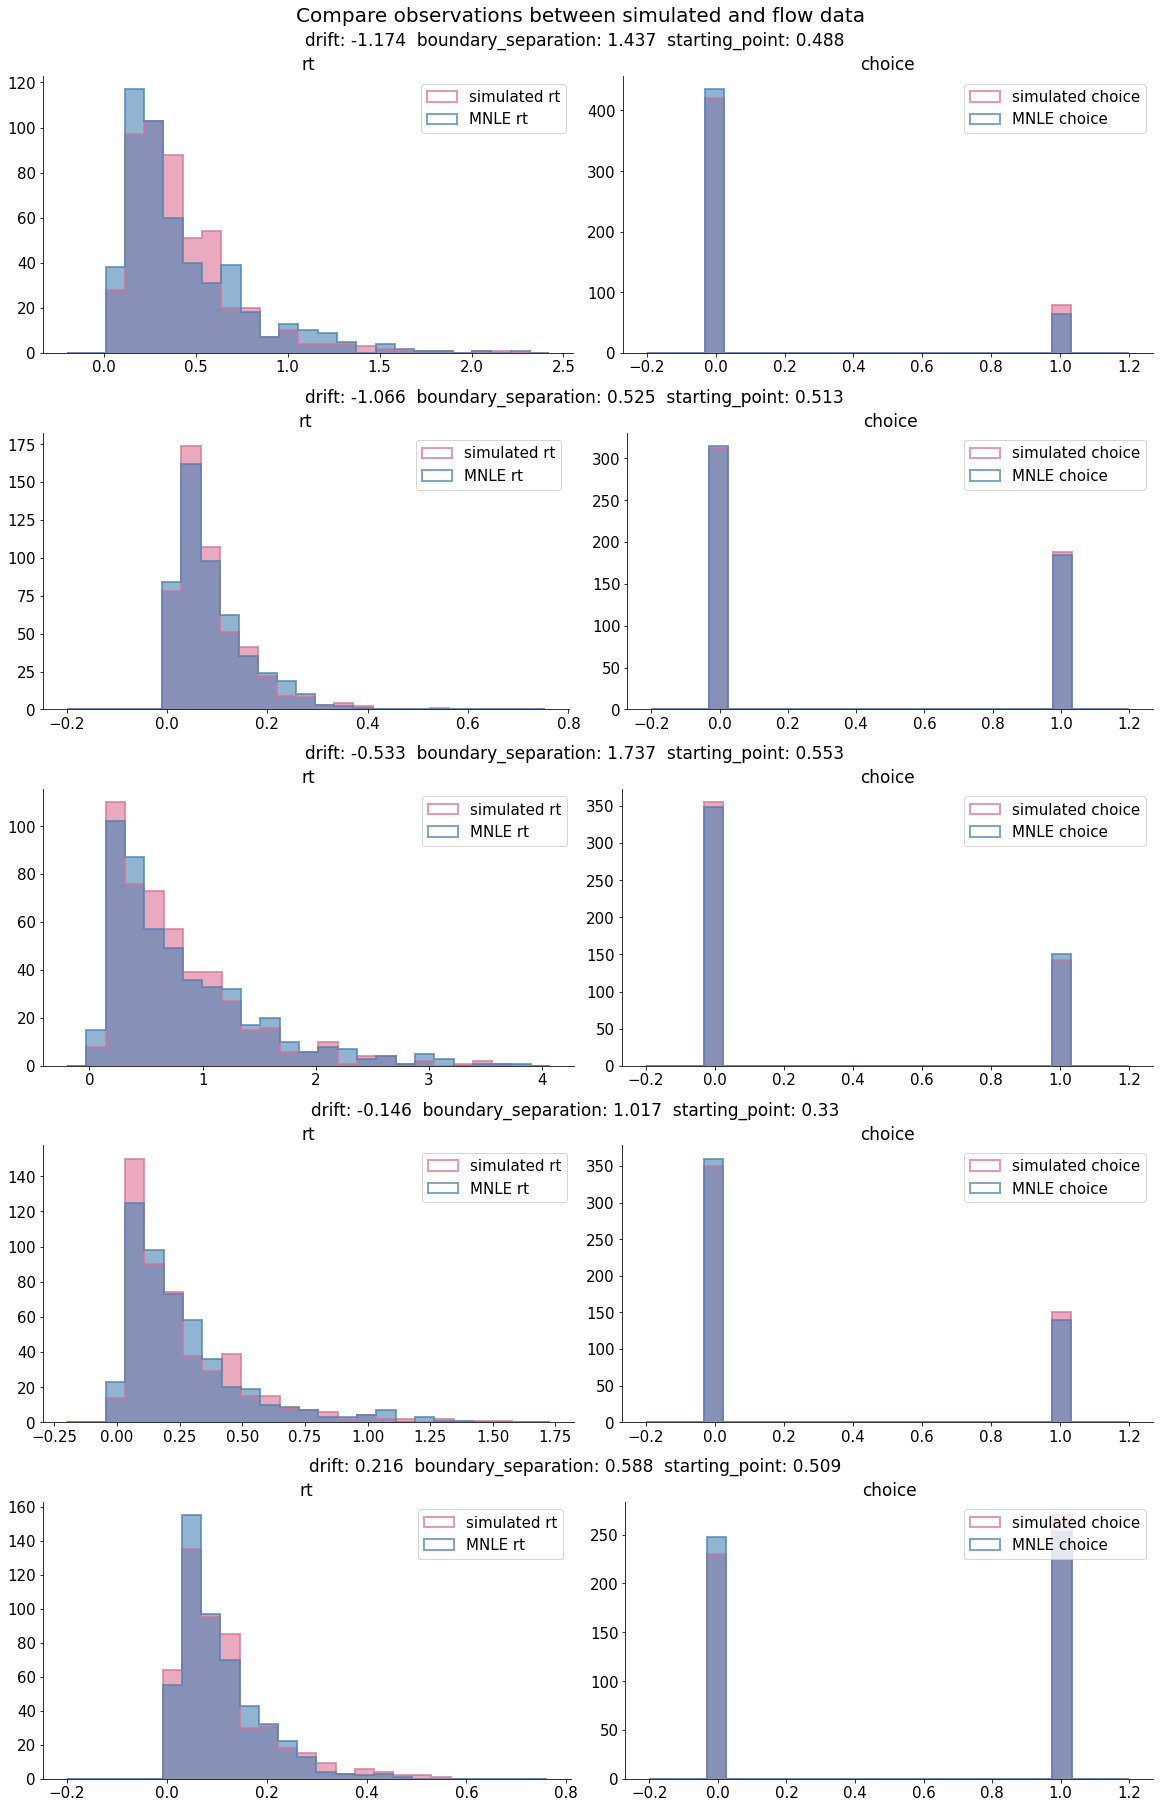


Posterior predictive


Running 5 MCMC chains in 5 batches.:   0%|          | 0/5 [00:00<?, ?it/s]

Generating samples: 100%|██████████| 20/20 [00:09<00:00,  2.04it/s]


Running 5 MCMC chains in 5 batches.:   0%|          | 0/5 [00:00<?, ?it/s]

Generating samples: 100%|██████████| 20/20 [00:09<00:00,  2.19it/s]


Running 5 MCMC chains in 5 batches.:   0%|          | 0/5 [00:00<?, ?it/s]

Generating samples: 100%|██████████| 20/20 [00:08<00:00,  2.33it/s]


Running 5 MCMC chains in 5 batches.:   0%|          | 0/5 [00:00<?, ?it/s]

Generating samples: 100%|██████████| 20/20 [00:08<00:00,  2.49it/s]


Running 5 MCMC chains in 5 batches.:   0%|          | 0/5 [00:00<?, ?it/s]

Generating samples: 100%|██████████| 20/20 [00:08<00:00,  2.44it/s]


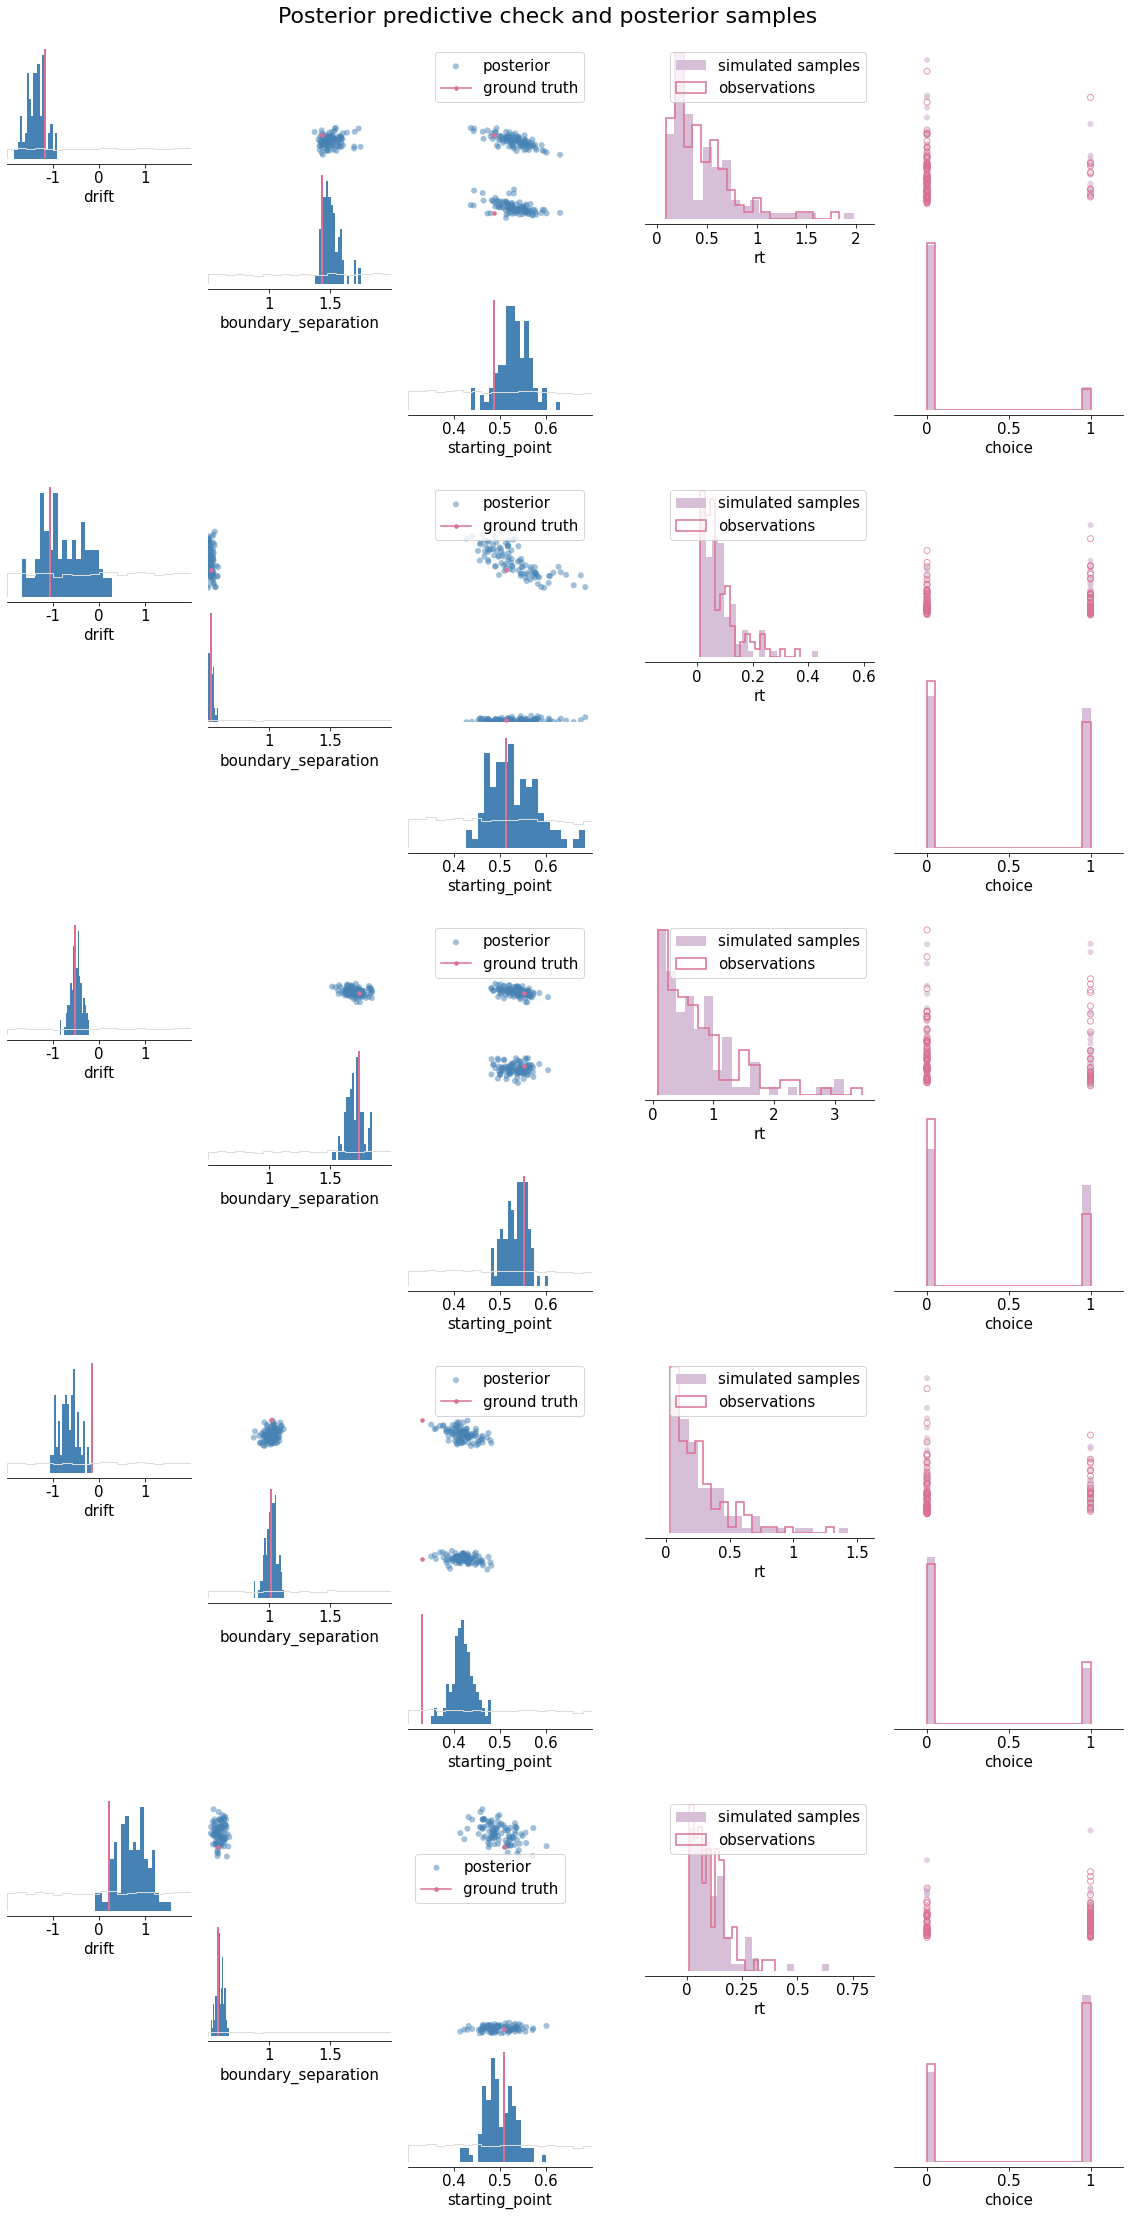

In [7]:
%run ../ddm_stride/run.py hydra.run.dir={dir} run_diagnose_fast=True 

### Run the evaluation on the experimental data
The observations names in *config/ddm_model* correspond to the `rt` and `choice` columns in the experimental data.

In [8]:
with hydra.initialize(config_path='../config'):
    cfg = hydra.compose(config_name='config')

experimental_data = load_experimental_data(cfg)
experimental_data

,monkey,rt,coh,correct,choice
0,1,0.355,0.512,1.0,0.0
1,1,0.359,0.256,1.0,1.0
2,1,0.525,0.128,1.0,1.0
3,1,0.332,0.512,1.0,1.0
4,1,0.302,0.032,0.0,0.0
...,...,...,...,...,...
6144,2,0.627,0.032,1.0,1.0
6145,2,0.581,0.256,1.0,1.0
6146,2,0.293,0.512,1.0,1.0
6147,2,0.373,0.128,1.0,0.0


In [ ]:
%run ../ddm_stride/run.py hydra.run.dir={dir} run_evaluate=True 